## Visulize this data 

In [1]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [2]:
data = np.loadtxt('data1.txt',delimiter=' ')

In [3]:
data

array([[ 0.09762701,  0.43037873,  1.        ],
       [ 0.20552675,  0.08976637,  1.        ],
       [-0.1526904 ,  0.29178823,  1.        ],
       ...,
       [-0.17112225,  0.5825631 ,  0.        ],
       [ 0.44239623, -0.03978439,  1.        ],
       [ 0.28772807,  0.00354626,  1.        ]])

In [4]:
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]
X=data[:,0:2]

In [5]:
X

array([[ 0.09762701,  0.43037873],
       [ 0.20552675,  0.08976637],
       [-0.1526904 ,  0.29178823],
       ...,
       [-0.17112225,  0.5825631 ],
       [ 0.44239623, -0.03978439],
       [ 0.28772807,  0.00354626]])

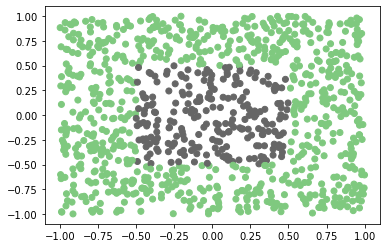

In [6]:
# create some random data grouped into three groups

# plot the data
fig = plt.figure()

plt.scatter(x1,x2, c = y, cmap='Accent')

plt.show()

##  use sklearn.tree.DecisionTreeClassifier to fit a decision tree to the data. and find the stopping criterion and plot the tree using graphviz.

In [7]:
# using gini index as stopping criterion.

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2)
treemodel = clf.fit(X, y)

In [34]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)
treemodel1 = clf1.fit(X, y)

In [33]:
clf2 = tree.DecisionTreeClassifier(max_depth=None)
treemodel2 = clf2.fit(X, y)

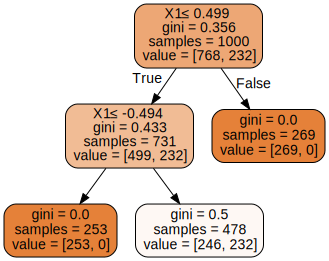

In [10]:
dot_data = tree.export_graphviz(treemodel, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

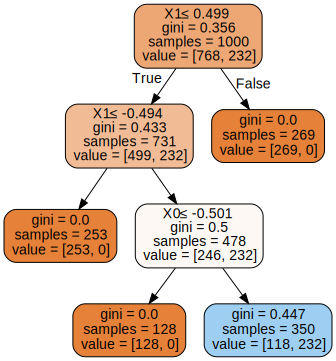

In [31]:
dot_data = tree.export_graphviz(treemodel1, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True, max_depth =3)
graph = graphviz.Source(dot_data)  
graph 

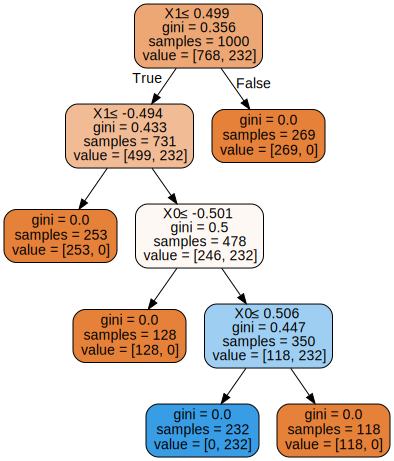

In [36]:
dot_data = tree.export_graphviz(treemodel2, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

## 3- Fit boosted decision stumps to this data using sklearn.ensemble.AdaBoostClassifier. Used a relatively small number of stumps,
the table below shows how accuracy on the training data improves as each successive stump is added.


In [12]:
from sklearn.ensemble import AdaBoostClassifier


In [13]:
for stump in [1,2,3,4,5,6,10,100]:
    ada = AdaBoostClassifier(n_estimators=stump, random_state=0)
    ada.fit(X, y)
    score=ada.score(X,y)
    print(f" stump: {stump}, score: {score}")


 stump: 1, score: 0.768
 stump: 2, score: 0.768
 stump: 3, score: 0.882
 stump: 4, score: 1.0
 stump: 5, score: 1.0
 stump: 6, score: 1.0
 stump: 10, score: 1.0
 stump: 100, score: 1.0
